---

### **Ejercicio: Vecinos a Distancia Exacta en Grafo Dirigido**

Dado un **grafo dirigido** representado como **lista de adyacencia**, implementa un algoritmo que determine, para cada nodo `v`, si existen **exactamente `k` nodos diferentes que estén a distancia `n`** de `v`, **siguiendo las direcciones de las aristas**.

#### **Entrada:**

* Una lista de adyacencia `G` que representa el grafo dirigido.
* Dos enteros: `k` (cantidad exacta de vecinos) y `n` (distancia objetivo).

#### **Salida:**

* Una lista con los nodos que tienen **exactamente `k` vecinos diferentes a distancia `n`**, considerando solo caminos **dirigidos desde `v`**.

---

#### **Ejemplo:**

```python
V = 5
G = {
    0: [1, 2],
    1: [3],
    2: [4],
    3: [],
    4: []
}
k = 1
n = 2
```

**Salida esperada:** `[]`

**Explicación:**

* Desde `0`, a distancia 2 están los nodos `3` (por `0→1→3`) y `4` (por `0→2→4`) → 2 vecinos → ❌
* Desde `1`, a distancia 2 no se alcanza a nadie → 0 vecinos → ❌
* Desde `2`, a distancia 2 no se alcanza a nadie → 0 vecinos → ❌
* Desde `3` y `4`, no hay salidas → 0 vecinos → ❌
  ➡️ Si `k=1`, no hay solución. Si cambiamos `k=2`, entonces la salida sería `[0]` ya que sólo `0` alcanza a **exactamente 2** nodos a distancia 2.

---



---

### **Ejercicio: Conteo de Caminos con Peso Exacto**

Dado un **grafo dirigido y ponderado** representado como **matriz de adyacencia**, implementa un algoritmo que cuente **cuántos caminos distintos existen entre dos nodos `u` y `v`** cuya **suma total de pesos sea exactamente `W`**.

#### **Entrada:**

* Una **matriz de adyacencia** `G` de tamaño `N × N`, donde `G[i][j]` es:

  * el peso de la arista desde `i` hacia `j` si existe,
  * o `-1` si no hay arista directa.
* Dos enteros: `u` (nodo origen) y `v` (nodo destino).
* Un entero `W`, peso total exacto del camino a buscar.

#### **Salida:**

* Un entero que indique la **cantidad de caminos dirigidos desde `u` hasta `v`** cuya **suma de pesos sea exactamente `W`**.

---

#### **Ejemplo:**

```python
V = 4
G = [
    [-1, 1, 2, -1],
    [-1, -1, -1, 2],
    [-1, -1, -1, 3],
    [-1, -1, -1, -1]
]
u = 0
v = 3
W = 5
```

**Salida esperada:** `1`

**Explicación:**

* Caminos posibles de `0` a `3`:

  * `0 → 1 → 3` con peso `1 + 2 = 3` → ❌
  * `0 → 2 → 3` con peso `2 + 3 = 5` → ✔️
---


In [1]:
G1 = [
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
]
nodos_g1 = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"]

G = [ 
[-1, 1, 2, -1], 
[-1, -1, -1, 2], 
[-1, -1, -1, 3], 
[-1, -1, -1, -1] 
] 
V = [0,1,2,3] 
u = 0 
v = 3 
W = 5

class Ejercicio2:
    def __init__(self, matriz, valores):
        self.matriz = matriz
        self.valores = valores

    def buscar_caminos(self, inicio, final, current = None, visitados = []):
        if inicio not in self.valores or final not in self.valores:
            return []
        if current is None:
            current = inicio
        if visitados == []:
            visitados.append(current)
        if current == final:
            print('aquita')
            return
        pos_current = self.valores.index(current)
        vecinos = self.matriz[pos_current]
        print(vecinos)
        for i, valor in enumerate(vecinos):
            if valor == 0:
                continue
            visitados.append(self.valores[i])
            #self.buscar_caminos(inicio, final, self.valores[i], visitados)
        return visitados

        

    

e2 = Ejercicio2(G1, nodos_g1)
print(e2.buscar_caminos('A', 'C'))

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
['A', 'B', 'K']


---

### **Ejercicio: Eliminación de Vértices con Grado de Entrada 1**

Dado un **grafo dirigido** representado mediante una **lista de adyacencia**, implementa un algoritmo que:

1. **Calcule el grado de entrada** (cantidad de aristas que llegan) de cada vértice.
2. **Identifique los vértices con grado de entrada exactamente igual a 1**.
3. **Elimine esos vértices del grafo**, junto con todas sus aristas entrantes y salientes.
4. Devuelva la nueva **lista de adyacencia resultante**.

> ⚠️ **Importante:** El grado de entrada debe calcularse **una única vez al inicio**, antes de eliminar cualquier nodo. No se deben recalcular grados durante la eliminación.

#### **Entrada:**

* Una **lista de adyacencia** `G` que representa un grafo dirigido. Cada entrada `G[i]` contiene una lista con los nodos hacia los que existe una arista desde `i`.

#### **Salida:**

* Una nueva lista de adyacencia sin los nodos que tenían grado de entrada 1, ni sus aristas salientes o entrantes.

---

#### **Ejemplo:**

```python
V = 5
G = {
    0: [1, 2],
    1: [3],
    2: [],
    3: [],
    4: [3]
}
```

**Grado de entrada inicial:**

* Nodo 0: 0
* Nodo 1: 1 ←
* Nodo 2: 1 ←
* Nodo 3: 2 ←←
* Nodo 4: 0

**Nodos con grado de entrada 1:** `1` y `2` → se eliminan.
**Resultado esperado:**

```python
{
    0: [],
    3: [],
    4: [3]
}
```

---

In [2]:
# Lista de adyacencia G1
lista_g1 = {
  'A': ['B', 'K'],
  'B': ['A', 'K'],
  'C': ['D', 'E', 'K'],
  'D': ['C'],
  'E': ['D'],
  'F': ['C', 'G', 'H', 'I'],
  'G': [],
  'H': [],
  'I': ['J'],
  'J': ['A', 'E'],
  'K': ['C', 'D']
    }

G = { 
0: [1, 2], 
1: [3], 
2: [], 
3: [], 
4: [3] 
} 

class Ejercicio3:
    def __init__(self, lista):
        self.lista = lista

    def GE(self, nodo):
        contador = 0
        for n in self.lista:
            if nodo in self.lista[n]:
                contador += 1
        return contador
    
    def grado_1(self):
        lista_filtrada = []
        for n in self.lista:
            grado = self.GE(n)
            if grado == 1:
                lista_filtrada.append(n)
        return lista_filtrada
    
    def eliminar(self, nodo):
        self.lista.pop(nodo)
        for n in self.lista:
            if nodo in self.lista[n]:
                self.lista[n].remove(nodo)

    def eliminar_grado_1(self):
        lista_filtrada = self.grado_1()
        for n in lista_filtrada:
            self.eliminar(n)

    def __repr__(self):
        return f'{self.lista}'
    

e3 = Ejercicio3(lista_g1)
print(e3)
e3.eliminar_grado_1()
print(e3)

{'A': ['B', 'K'], 'B': ['A', 'K'], 'C': ['D', 'E', 'K'], 'D': ['C'], 'E': ['D'], 'F': ['C', 'G', 'H', 'I'], 'G': [], 'H': [], 'I': ['J'], 'J': ['A', 'E'], 'K': ['C', 'D']}
{'A': ['K'], 'C': ['D', 'E', 'K'], 'D': ['C'], 'E': ['D'], 'F': ['C'], 'K': ['C', 'D']}


# Grafos de prueba

### Grafo G1

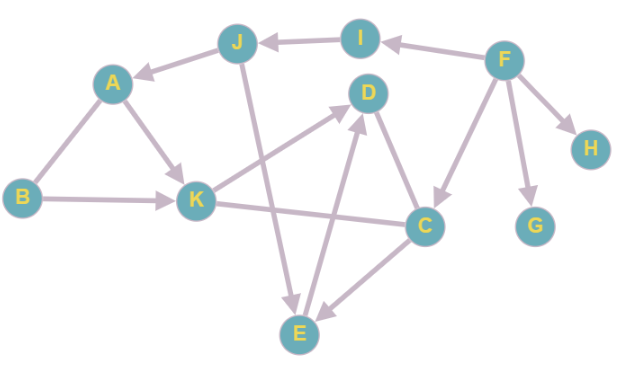

In [3]:
# Matriz de adyacencia G1

G1 = [
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
]
nodos_g1 = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"]


# Lista de adyacencia G1
lista_g1 = {
  'A': ['B', 'K'],
  'B': ['A', 'K'],
  'C': ['D', 'E', 'K'],
  'D': ['C'],
  'E': ['D'],
  'F': ['C', 'G', 'H', 'I'],
  'G': [],
  'H': [],
  'I': ['J'],
  'J': ['A', 'E'],
  'K': ['C', 'D']
    }

### Grafo G2

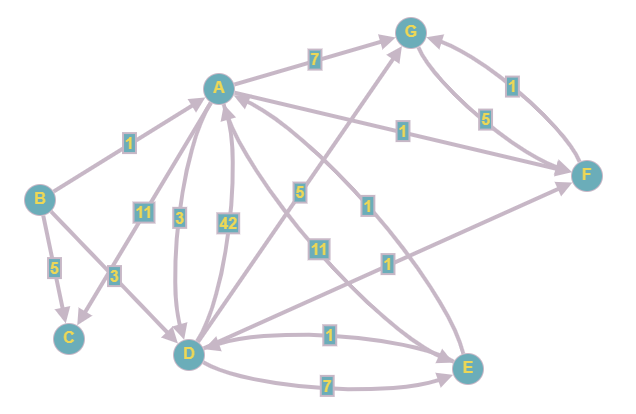

In [4]:
# Matriz de adyacenica y nodos G2
G2 = [
  [-1, -1, 11, 3, 11, 1, 7],
  [1, -1, 5, 3, -1, -1, -1],
  [-1, -1, -1, -1, -1, -1, -1],
  [42, -1, -1, -1, 7, 1, 5],
  [1, -1, -1, 1, -1, -1, -1],
  [-1, -1, -1, -1, -1, -1, 1],
  [-1, -1, -1, -1, -1, 5, -1]
]

nodos_g2 = ["A", "B", "C", "D", "E", "F", "G"]

# Lista de adyacencia G2
matriz_a_lista_adyacencia(G2, nodos_g2)
lista_g2 = {
  'A': [('C', 11), ('D', 3), ('E', 11), ('F', 1), ('G', 7)],
  'B': [('A', 1), ('C', 5), ('D', 3)],
  'C': [],
  'D': [('A', 42), ('E', 7), ('F', 1), ('G', 5)],
  'E': [('A', 1), ('D', 1)],
  'F': [('G', 1)],
  'G': [('F', 5)]
    }

NameError: name 'matriz_a_lista_adyacencia' is not defined